In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import ML libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
import pickle # to save and load pre-trained models

In [25]:
%matplotlib inline

In [26]:
!dir

 ’®¬ ў гбва®©бвўҐ D Ё¬ҐҐв ¬ҐвЄг Ќ®ўл© в®¬
 ‘ҐаЁ©­л© ­®¬Ґа в®¬ : F89F-7E89

 ‘®¤Ґа¦Ё¬®Ґ Ї ЇЄЁ D:\PROJECTS\Binance\Trading_bot_working\ML-training

25.10.2020  15:10    <DIR>          .
25.10.2020  15:10    <DIR>          ..
04.10.2020  16:17    <DIR>          .ipynb_checkpoints
12.09.2020  21:07        10я294я827 buy_signals_backtest_ML_Jan2019-Aug2020.dat
13.09.2020  06:27         3я578я133 buy_signals_backtest_ML_July-Aug2020.dat
25.10.2020  11:49         4я068я842 buy_signals_backtest_ML_July-Aug2020_volume.dat
25.10.2020  15:10           151я829 C1M_ML_analysis-volume.ipynb
04.10.2020  16:16           128я423 C1M_ML_analysis.ipynb
16.09.2020  07:54             8я867 C1M_ML_analysis.py
16.09.2020  07:54             1я034 logregression.pickle
               7 д ©«®ў     18я231я955 Ў ©в
               3 Ї Ї®Є  30я652я940я288 Ў ©в бў®Ў®¤­®


In [27]:
#trades_df = pd.read_csv('buy_signals_backtest_ML_July-Aug2020.dat')
trades_df = pd.read_csv('buy_signals_backtest_ML_July-Aug2020_volume.dat')
#trades_df.set_index('time_curr', inplace=True)
#trades_df.index=pd.to_datetime(trades_df.index)

In [28]:
trades_df.columns

Index(['time_curr', 'symbol', 'price', 'pattern', 'origin', 'ranging',
       'd_ranging', 'lower', 'upper', 'middle', 'd_lower', 'd_upper',
       'd_middle', 'ema_10', 'ema_200', 'd_ema_10', 'd_ema_200', 'k_15',
       'd_15', 'd_k_15', 'd_d_15', 'stoch_cond_5', 'candle_color', 'volume',
       'ntrades', 'tb_volume', 'vol_inc', 'dist_to_BB', 'profit', 'elapsed',
       'min_price', 'max_price', 'profit_s15', 'elapsed_s15', 'min_price_s15',
       'max_price_s15', 'Unnamed: 36'],
      dtype='object')

In [29]:
profitability = [0 if item < 0 else 1 for item in trades_df['profit']]
trades_df['profitability'] = profitability
profitability_s15 = [0 if item < 0 else 1 for item in trades_df['profit_s15']]
trades_df['profitability_s15'] = profitability_s15


Convert 'time_curr' to `datetime` object

In [30]:
trades_df['time_curr'] = pd.to_datetime(trades_df['time_curr'])

In [31]:
# Sort the dataframe by the date:
trades_df.sort_values(by=['time_curr'], inplace=True)

In [32]:
trades_df.columns

Index(['time_curr', 'symbol', 'price', 'pattern', 'origin', 'ranging',
       'd_ranging', 'lower', 'upper', 'middle', 'd_lower', 'd_upper',
       'd_middle', 'ema_10', 'ema_200', 'd_ema_10', 'd_ema_200', 'k_15',
       'd_15', 'd_k_15', 'd_d_15', 'stoch_cond_5', 'candle_color', 'volume',
       'ntrades', 'tb_volume', 'vol_inc', 'dist_to_BB', 'profit', 'elapsed',
       'min_price', 'max_price', 'profit_s15', 'elapsed_s15', 'min_price_s15',
       'max_price_s15', 'Unnamed: 36', 'profitability', 'profitability_s15'],
      dtype='object')

In [33]:
trades_df.set_index('time_curr')["2020-09"]

,symbol,price,pattern,origin,ranging,d_ranging,lower,upper,middle,d_lower,...,elapsed,min_price,max_price,profit_s15,elapsed_s15,min_price_s15,max_price_s15,Unnamed: 36,profitability,profitability_s15
time_curr,,,,,,,,,,,,,,,,,,,,,
2020-09-01 00:48:00,OMGBTC,0.000437,no,lower,5.694,-0.050,0.000431,0.000459,0.000445,-1.000000e-07,...,346.0,-2.50,1.21,-1.5,309.0,-1.25,1.21,NaN,0,0
2020-09-01 07:10:00,OMGBTC,0.000428,no,lower,4.432,0.020,0.000426,0.000444,0.000435,-1.100000e-07,...,243.0,-2.50,1.40,-1.5,243.0,-1.25,1.40,NaN,0,0
2020-09-01 07:16:00,OMGBTC,0.000428,no,lower,4.433,0.000,0.000425,0.000444,0.000435,-8.000000e-08,...,237.0,-2.50,1.47,-1.5,237.0,-1.25,1.47,NaN,0,0
2020-09-01 16:05:00,LRCBTC,0.000018,no,lower,5.087,0.000,0.000018,0.000019,0.000018,-1.000000e-08,...,35.0,0.00,1.29,1.5,35.0,0.00,1.29,NaN,1,1
2020-09-01 16:15:00,QTUMBTC,0.000287,Harami,lower,4.533,0.012,0.000287,0.000299,0.000293,-5.000000e-08,...,24.0,-0.24,1.77,1.5,24.0,-0.24,1.77,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-30 19:15:00,FETBTC,0.000006,no,lower,6.759,0.013,0.000006,0.000007,0.000007,-0.000000e+00,...,109.0,-0.31,1.26,1.5,109.0,-0.31,1.26,NaN,1,1
2020-09-30 19:16:00,SXPBTC,0.000155,Harami,lower,4.184,0.005,0.000155,0.000161,0.000158,-2.000000e-08,...,56.0,-0.94,1.60,1.5,56.0,-0.94,1.60,NaN,1,1
2020-09-30 19:17:00,RENBTC,0.000022,Hammer,lower,5.630,0.025,0.000022,0.000023,0.000022,-0.000000e+00,...,19.0,0.00,0.00,1.5,19.0,-0.19,1.76,NaN,1,1


In [34]:
trades_df.time_curr.iloc[-1]

Timestamp('2020-10-25 11:03:00')

In [35]:
time_span = trades_df.time_curr.iloc[-1] - trades_df.time_curr.iloc[0]
print(f"Start trade: {trades_df.time_curr.iloc[0]}, end trade: {trades_df.time_curr.iloc[-1]} ")
print(f"Total profitability in {time_span}: ", trades_df['profitability'].sum()/len(trades_df['profitability']) )
print("total n trades: ", len(trades_df['profitability']))
print(f"Total profitability in {time_span} with 0.15 stop loss: ", trades_df['profitability_s15'].sum()/len(trades_df['profitability_s15']) )
print("total n trades: ", len(trades_df['profitability_s15']))

Start trade: 2020-07-02 00:00:00, end trade: 2020-10-25 11:03:00 
Total profitability in 115 days 11:03:00:  0.6163383874167493
total n trades:  14114
Total profitability in 115 days 11:03:00 with 0.15 stop loss:  0.4427518775683718
total n trades:  14114


In [36]:
trades_df.drop(['Unnamed: 36'], axis=1, inplace=True)

In [37]:
trades_df['profitability']

12643    1
12644    1
12645    1
11653    0
11654    0
        ..
13351    1
14084    1
13837    1
13792    0
14113    1
Name: profitability, Length: 14114, dtype: int64

In [38]:
pd.set_option('max_columns',100)

In [39]:
#trades_df.dropna(axis=1, inplace=True)
trades_df.fillna(-9999, inplace=True)

In [40]:
trades_df = trades_df[trades_df.d_ema_200 != -9999]

In [41]:
# Remove the problematic coin that has been identified later
#trades_df = trades_df[trades_df.symbol != 'UMABTC']

In [42]:
trades_df.describe()

,price,ranging,d_ranging,lower,upper,middle,d_lower,d_upper,d_middle,ema_10,ema_200,d_ema_10,d_ema_200,k_15,d_15,d_k_15,d_d_15,volume,ntrades,tb_volume,vol_inc,dist_to_BB,profit,elapsed,min_price,max_price,profit_s15,elapsed_s15,min_price_s15,max_price_s15,profitability,profitability_s15
count,13562.000000,13562.000000,13562.000000,13562.000000,13562.000000,13562.000000,1.356200e+04,1.356200e+04,1.356200e+04,13562.000000,13562.000000,1.356200e+04,1.356200e+04,13562.000000,13562.000000,13562.000000,13562.000000,13562.000000,13562.000000,13562.000000,13562.000000,13562.000000,13562.000000,13562.000000,13562.000000,13562.000000,13562.000000,13562.000000,13562.000000,13562.000000,13562.000000,13562.000000
mean,0.000374,8.736665,0.018527,0.000370,0.000400,0.000385,-1.101106e-07,4.999263e-10,-5.459740e-08,0.000379,0.000387,-9.477511e-08,-9.643120e-09,17.985580,11.538269,0.511211,0.265893,12.384139,483.760581,5.738814,1.291381,3.362969,-0.235695,116.094971,-1.426470,1.423317,-0.179177,60.396697,-0.887215,1.153465,0.614290,0.440274
std,0.000962,5.157826,0.048464,0.000952,0.001028,0.000990,4.455224e-07,2.236064e-07,2.107911e-07,0.000975,0.001000,3.198659e-07,7.064269e-08,6.331302,5.631111,0.269665,0.163142,30.131103,731.098935,13.987773,2.993101,2.113424,2.190512,224.325547,1.023047,1.295999,1.489315,116.914853,0.484092,1.146830,0.486781,0.496438
min,0.000002,4.000000,-0.515000,0.000002,0.000002,0.000002,-9.980000e-06,-1.008000e-05,-4.110000e-06,0.000002,0.000002,-6.850000e-06,-2.170000e-06,10.000000,3.330000,0.000000,0.000000,0.007000,2.000000,0.000400,0.000000,1.500000,-3.000000,1.000000,-2.500000,-5.020000,-1.500000,1.000000,-1.250000,-5.020000,0.000000,0.000000
25%,0.000011,5.421000,0.001000,0.000011,0.000011,0.000011,-6.000000e-08,0.000000e+00,-3.000000e-08,0.000011,0.000011,-5.000000e-08,-0.000000e+00,12.110000,6.940000,0.320000,0.150000,1.887000,140.000000,0.797400,0.271000,2.001000,-3.000000,20.000000,-2.500000,0.470000,-1.500000,11.000000,-1.250000,0.270000,0.000000,0.000000
50%,0.000050,7.250500,0.016000,0.000049,0.000054,0.000051,-1.000000e-08,0.000000e+00,-0.000000e+00,0.000051,0.000051,-1.000000e-08,-0.000000e+00,16.750000,10.550000,0.500000,0.240000,4.295500,266.000000,1.907893,0.678000,2.722500,1.500000,51.000000,-1.505000,1.510000,-1.500000,26.500000,-1.250000,0.970000,1.000000,0.000000
75%,0.000257,10.327750,0.034000,0.000254,0.000278,0.000266,-0.000000e+00,0.000000e+00,0.000000e+00,0.000261,0.000271,-0.000000e+00,0.000000e+00,23.357500,15.350000,0.690000,0.370000,10.649750,538.000000,4.820838,1.384000,4.015000,1.500000,126.000000,-0.380000,1.920000,1.500000,66.000000,-0.450000,1.720000,1.000000,1.000000
max,0.008671,86.989000,1.274000,0.008469,0.008904,0.008673,4.440000e-06,5.350000e-06,1.560000e-06,0.008670,0.008404,4.900000e-07,9.800000e-07,30.000000,29.900000,2.000000,0.670000,942.345000,18510.000000,369.195413,175.207000,35.896000,1.500000,5916.000000,0.830000,36.020000,1.500000,3498.000000,0.830000,33.920000,1.000000,1.000000


### Now we start preparing the dataset to train a model using various Machine Learning methods

1. Features:

In [43]:
X = trades_df.drop(['symbol','profit',
                    'stoch_cond_5','vol_inc',
       'elapsed', 'min_price', 'max_price', 'profit_s15', 'elapsed_s15',
       'min_price_s15', 'max_price_s15',  'profitability',
       'profitability_s15'], axis=1)

# For the 1st trial, let us also drop all categorical variables:
# X = trades_df.drop(['time_curr','profit',
#                     'pattern','origin','symbol','stoch_cond_5','candle_color',
#        'elapsed', 'min_price', 'max_price', 'profit_s15', 'elapsed_s15',
#        'min_price_s15', 'max_price_s15',  'profitability',
#        'profitability_s15'], axis=1)

In [44]:
#X['stoch_cond_5'] = X['stoch_cond_5'].astype('str')

In [45]:
### Looks like features from timestamps don't help
# X['day'] = X.time_curr.dt.day.astype('uint8')
# X['hour'] = X.time_curr.dt.hour.astype('uint8')
# X['minute'] = X.time_curr.dt.minute.astype('uint8')

In [46]:
X.drop(['time_curr'], axis=1, inplace=True)

In [47]:
X.columns

Index(['price', 'pattern', 'origin', 'ranging', 'd_ranging', 'lower', 'upper',
       'middle', 'd_lower', 'd_upper', 'd_middle', 'ema_10', 'ema_200',
       'd_ema_10', 'd_ema_200', 'k_15', 'd_15', 'd_k_15', 'd_d_15',
       'candle_color', 'volume', 'ntrades', 'tb_volume', 'dist_to_BB'],
      dtype='object')

In [48]:
# Let's try to drop all prices and keep only the slopes and percentages: (No!)
## X = X.drop(['price', 'lower', 'upper', 'middle', 'ema_10'], axis=1)

In [49]:
#for col in ['d_lower', 'd_upper', 'd_middle', 'd_ema_10', 'd_ema_200' ]: X[col] = X[col]*100000
# Now try to scale the price to 1 satoshi:
for col in ['price','lower','upper','middle','d_lower', 'd_upper', 'd_middle',
            'ema_10', 'ema_200','d_ema_10', 'd_ema_200' ]: X[col] = X[col]*1e5

In [50]:
X.head()

,price,pattern,origin,ranging,d_ranging,lower,upper,middle,d_lower,d_upper,d_middle,ema_10,ema_200,d_ema_10,d_ema_200,k_15,d_15,d_k_15,d_d_15,candle_color,volume,ntrades,tb_volume,dist_to_BB
11666,2.241,no,lower,5.444,0.011,2.226,2.343,2.284,-0.001,-0.0,-0.0,2.263,2.403,-0.001,-0.0,20.38,17.00,0.50,0.02,red,3.301,448,1.313038,1.932
11668,2.237,no,lower,5.599,0.010,2.220,2.340,2.280,-0.000,-0.0,-0.0,2.258,2.401,-0.000,-0.0,18.06,14.85,0.30,0.01,green,3.713,351,1.619265,1.924
10180,4.023,no,upper,4.460,-0.014,3.926,4.110,4.018,0.001,-0.0,0.0,4.025,3.799,-0.000,0.0,18.73,15.32,0.22,0.31,red,6.100,202,1.633603,2.150
405,4.023,no,upper,4.460,-0.014,3.926,4.110,4.018,0.001,-0.0,0.0,4.025,3.799,-0.000,0.0,18.73,15.32,0.22,0.31,red,6.100,202,1.633603,2.150
11670,2.209,Doji,lower,5.350,0.011,2.191,2.304,2.248,-0.000,-0.0,-0.0,2.222,2.390,-0.000,-0.0,11.53,4.81,0.64,0.21,green,1.096,78,0.508115,1.752


2. Target:

Here we predict whether the trade is going to be profitable or not.

In [51]:
y = trades_df.profitability_s15
# what if we predict profitability for stop loss 0.3?
#y = trades_df.profitability

In [52]:
y

11666    0
11668    0
10180    0
405      0
11670    0
        ..
13351    0
14084    1
13837    1
13792    0
14113    1
Name: profitability_s15, Length: 13562, dtype: int64

In [53]:
#test_size = 2000

# Make sure that there are no new symbols in the test dataset

# for item_val in X.symbol.tail(test_size).unique():
#     if item_val not in X.symbol.iloc[:-test_size].unique(): print(item_val)

    
    

In [54]:
# X = X[X.symbol != 'UMABTC']
# y = y[X.symbol != 'UMABTC']

In [55]:

# for item_val in X.symbol.tail(test_size).unique():
#     if item_val not in X.symbol.iloc[:-test_size].unique(): print(item_val)

 

### Train and test split

In [56]:
# Random split
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=101)

# More realistic split is where we choose the latest deals as test data. Remove last rows:
#test_size = 2000
test_size = 1000
# Remove last rows from the dataset
X_train, y_train = X.iloc[:-test_size], y.iloc[:-test_size]
X_val, y_val = X.tail(test_size), y.tail(test_size)

### Categorical encoding

3. Now it's time to make cathegorical encodings (or wait, let's do it later!) :-)

In [57]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()

In [58]:
# categorical = ['pattern', 'origin', 'stoch_cond_5', 'candle_color']
# label = ['symbol']

In [59]:
# for col in label:
#     X_train[col] = label_encoder.fit_transform(X_train[col])
#     X_val[col] = label_encoder.transform(X_val[col])

In [60]:
# For now go with the simplest One-Hot encoding provided by pandas:
X_train, X_val = pd.get_dummies(X_train), pd.get_dummies(X_val)

In [61]:
#X_train, X_val = preprocessing.scale(X_train), preprocessing.scale(X_val)

In [62]:
X_train

,price,ranging,d_ranging,lower,upper,middle,d_lower,d_upper,d_middle,ema_10,ema_200,d_ema_10,d_ema_200,k_15,d_15,d_k_15,d_d_15,volume,ntrades,tb_volume,dist_to_BB,pattern_Bullish eng.,pattern_Doji,pattern_Hammer,pattern_Harami,pattern_no,origin_lower,origin_upper,candle_color_green,candle_color_red
11666,2.241,5.444,0.011,2.226,2.343,2.284,-0.001,-0.000,-0.000,2.263,2.403,-0.001,-0.000,20.38,17.00,0.50,0.02,3.301,448,1.313038,1.932,0,0,0,0,1,1,0,0,1
11668,2.237,5.599,0.010,2.220,2.340,2.280,-0.000,-0.000,-0.000,2.258,2.401,-0.000,-0.000,18.06,14.85,0.30,0.01,3.713,351,1.619265,1.924,0,0,0,0,1,1,0,1,0
10180,4.023,4.460,-0.014,3.926,4.110,4.018,0.001,-0.000,0.000,4.025,3.799,-0.000,0.000,18.73,15.32,0.22,0.31,6.100,202,1.633603,2.150,0,0,0,0,1,0,1,0,1
405,4.023,4.460,-0.014,3.926,4.110,4.018,0.001,-0.000,0.000,4.025,3.799,-0.000,0.000,18.73,15.32,0.22,0.31,6.100,202,1.633603,2.150,0,0,0,0,1,0,1,0,1
11670,2.209,5.350,0.011,2.191,2.304,2.248,-0.000,-0.000,-0.000,2.222,2.390,-0.000,-0.000,11.53,4.81,0.64,0.21,1.096,78,0.508115,1.752,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4790,11.290,7.350,0.023,11.246,12.033,11.640,-0.003,0.000,-0.002,11.460,11.884,-0.002,-0.000,29.76,20.15,0.63,0.66,3.171,157,1.676242,3.096,0,1,0,0,0,1,0,1,0
1625,2.109,5.842,0.015,2.094,2.212,2.153,-0.001,0.000,-0.000,2.127,2.192,-0.000,-0.000,10.99,5.99,0.43,0.24,5.559,166,1.601865,2.082,0,0,1,0,0,1,0,0,1
1925,5.127,10.096,0.005,5.054,5.560,5.307,-0.002,-0.001,-0.001,5.190,5.144,-0.002,-0.000,10.04,4.35,0.54,0.22,5.989,228,2.098160,3.513,0,0,0,0,1,1,0,0,1
3130,20.029,13.075,0.040,19.659,22.112,20.886,-0.011,0.003,-0.004,20.344,21.145,-0.008,-0.001,10.65,5.16,0.51,0.24,1.478,111,0.883157,4.277,0,0,0,0,1,1,0,0,1


### Define a function to compare different methods

In [63]:
# function for comparing different approaches
def score_dataset(model, X_train, X_val, y_train, y_val, **kwargs):
    '''Trains a model, makes predictions. 
    Prints classification report
    Returns mean absolute error'''
    #Modified from: https://www.kaggle.com/alexisbcook/exercise-categorical-variables
    model.fit(X_train, y_train, **kwargs)
    preds = model.predict(X_val)
    print(classification_report(y_val,preds))
    return mean_absolute_error(y_val, preds)

In [64]:
# Create a function to avoid copy-and-paste
def train_and_score_flow(X, y, message=''):
    '''Makes train and test split and evaluates the model based on given features (X) and target (y)'''    
    # Train and test split
    # Remove last rows from the dataset
    #test_size = 500
    X_train, y_train = X.iloc[:-test_size], y.iloc[:-test_size]
    X_val, y_val = X.tail(test_size), y.tail(test_size)
    # Categorical encoding
    X_train, X_val = pd.get_dummies(X_train), pd.get_dummies(X_val)
    #X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=101)
    #random_forest_basic = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
    LogisticRegression_basic = LogisticRegression(solver='warn')
    #print("Random Forest (drop all NaNs):")
    print(message)
    print( score_dataset(LogisticRegression_basic, X_train, X_val, y_train, y_val) )

4. Let's already try some methods:

### Random Forest

In [65]:
random_forest_basic = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=1)

In [66]:
print("Random Forest :")
score_dataset(random_forest_basic, X_train, X_val, y_train, y_val)

Random Forest :
              precision    recall  f1-score   support

           0       0.64      0.78      0.70       584
           1       0.55      0.39      0.45       416

    accuracy                           0.61      1000
   macro avg       0.60      0.58      0.58      1000
weighted avg       0.60      0.61      0.60      1000



0.386

### Logistic regression

In [67]:
logmodel_basic = LogisticRegression(solver='warn')

In [68]:

print("Logistic regression :")
score_dataset(logmodel_basic, X_train, X_val, y_train, y_val)

Logistic regression :


C:\Users\Taras\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.63      0.85      0.72       584
           1       0.58      0.29      0.39       416

    accuracy                           0.62      1000
   macro avg       0.60      0.57      0.55      1000
weighted avg       0.61      0.62      0.58      1000



0.384

### Try to evaluate model with different combination of features

In [69]:
X1 = X.drop(['d_ranging'], axis=1)

In [70]:
train_and_score_flow(X1, y, message='drop d_ranging:')

drop d_ranging:
              precision    recall  f1-score   support

           0       0.60      0.91      0.72       584
           1       0.52      0.13      0.21       416

    accuracy                           0.59      1000
   macro avg       0.56      0.52      0.46      1000
weighted avg       0.56      0.59      0.51      1000

0.412


C:\Users\Taras\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [71]:
X.columns

Index(['price', 'pattern', 'origin', 'ranging', 'd_ranging', 'lower', 'upper',
       'middle', 'd_lower', 'd_upper', 'd_middle', 'ema_10', 'ema_200',
       'd_ema_10', 'd_ema_200', 'k_15', 'd_15', 'd_k_15', 'd_d_15',
       'candle_color', 'volume', 'ntrades', 'tb_volume', 'dist_to_BB'],
      dtype='object')

In [72]:
X2 = X.drop(['volume', 'ntrades'], axis=1)
train_and_score_flow(X2, y, message='drop volume and n_trades')

drop volume and n_trades


C:\Users\Taras\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.63      0.85      0.72       584
           1       0.59      0.29      0.39       416

    accuracy                           0.62      1000
   macro avg       0.61      0.57      0.56      1000
weighted avg       0.61      0.62      0.58      1000

0.38


In [73]:
X3 = X.drop(['d_upper'], axis=1)
train_and_score_flow(X3, y, message='drop d_upper')

drop d_upper


C:\Users\Taras\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.63      0.85      0.72       584
           1       0.58      0.29      0.39       416

    accuracy                           0.62      1000
   macro avg       0.60      0.57      0.55      1000
weighted avg       0.61      0.62      0.58      1000

0.384


In [74]:
X4 = X.drop(['volume', 'ntrades', 'd_upper'], axis=1)
train_and_score_flow(X2, y, message='drop volume and n_trades and d_upper')

drop volume and n_trades and d_upper


C:\Users\Taras\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.63      0.85      0.72       584
           1       0.59      0.29      0.39       416

    accuracy                           0.62      1000
   macro avg       0.61      0.57      0.56      1000
weighted avg       0.61      0.62      0.58      1000

0.38


Check feature importance

In [75]:
logmodel_basic.fit(X_train, y_train)

C:\Users\Taras\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
logmodel_basic.score(X_val, y_val)

0.616

In [77]:
importance = logmodel_basic.coef_[0]

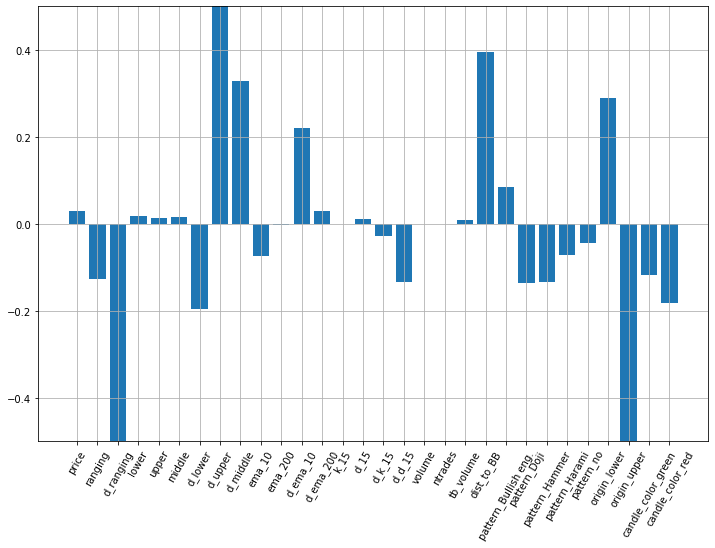

In [78]:
plt.figure(figsize=(12,8))
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(np.arange(len(importance)), X_val.columns, rotation=60)
plt.ylim([-0.5,0.5])
plt.grid()
plt.show()

In [79]:
len(importance)

30

In [80]:
preds = logmodel_basic.predict(X_val)


In [81]:
#print(confusion_matrix(y_val,preds))
confusion_matrix(y_val,preds)

array([[494,  90],
       [294, 122]], dtype=int64)

In [82]:
logmodel_basic.predict_proba(X_val) 

array([[0.55619601, 0.44380399],
       [0.60742017, 0.39257983],
       [0.59127261, 0.40872739],
       ...,
       [0.43784611, 0.56215389],
       [0.56886157, 0.43113843],
       [0.50079594, 0.49920406]])

In [83]:
# try different solvers for logostic regression
# solvers = {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}
# for solver in solvers:
#     logmodel_solv = LogisticRegression(solver=solver)
#     print(f"Solver : {solver}")
#     score_dataset(logmodel_solv, X_train, X_val, y_train, y_val)

### Optimize hyperparameters

In [84]:
# Taken from: https://github.com/finnqiao/bank-logistic/blob/master/bank-logistic-v2.ipynb
# https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5

# Create first pipeline for base without reducing features.

#pipe = Pipeline([('classifier' , RandomForestClassifier())])
pipe = Pipeline([('classifier' , LogisticRegression())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

# param_grid = [
#     {'classifier' : [LogisticRegression()],
#      'classifier__penalty' : ['l1', 'l2'],
#     'classifier__C' : np.logspace(-4, 4, 20),
#     'classifier__solver' : ['liblinear']},
#     {'classifier' : [RandomForestClassifier()],
#     'classifier__n_estimators' : list(range(10,101,10)),
#     'classifier__max_features' : list(range(5,31,5))}
# ]

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  7.5min finished
C:\Users\Taras\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [85]:
best_clf.best_estimator_.get_params()['classifier']

LogisticRegression(C=3792.690190732246, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
best_clf.best_estimator_.get_params()

{'memory': None,
 'steps': [('classifier',
   LogisticRegression(C=3792.690190732246, class_weight=None, dual=False,
                      fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                      max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                      random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                      warm_start=False))],
 'verbose': False,
 'classifier': LogisticRegression(C=3792.690190732246, class_weight=None, dual=False,
                    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                    max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                    random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                    warm_start=False),
 'classifier__C': 3792.690190732246,
 'classifier__class_weight': None,
 'classifier__dual': False,
 'classifier__fit_intercept': True,
 'classifier__intercept_scaling': 1,
 'classifier__l1_ratio': None,
 'classi

In [87]:
best_clf.score(X_val, y_val)

0.616

In [88]:
preds2 = best_clf.predict(X_val)

In [89]:
print( classification_report(y_val, preds2) )

              precision    recall  f1-score   support

           0       0.63      0.81      0.71       584
           1       0.56      0.34      0.43       416

    accuracy                           0.62      1000
   macro avg       0.60      0.58      0.57      1000
weighted avg       0.60      0.62      0.59      1000



In [90]:
mean_absolute_error(y_val, preds2)

0.384

### XG Boost

In [91]:
XGB_basic = XGBClassifier(n_estimators=1000, learning_rate=0.01, random_state=0)

In [92]:
# XGB_basic.fit(X_train, y_train,
#              early_stopping_rounds=5, 
#              eval_set=[(X_val, y_val)], 
#              verbose=False)

In [93]:
print("XG Boost :")
score_dataset(XGB_basic, X_train, X_val, y_train, y_val,
             early_stopping_rounds=10,
             eval_set=[(X_val, y_val)],
             verbose=False)

XG Boost :
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       584
           1       0.56      0.53      0.54       416

    accuracy                           0.63      1000
   macro avg       0.62      0.62      0.62      1000
weighted avg       0.63      0.63      0.63      1000



0.37

In [94]:
#val_preds_XGB = XGB_basic.predict(X_val)

In [95]:
#mae = mean_absolute_error(val_preds_XGB, y_val)

In [96]:
#print(f"MAE for the XG Boost without categorical features: {mae}")

### Light GBM

In [103]:
from lightgbm import LGBMClassifier

In [113]:
def score_dataset_lgb( X_train, X_val, y_train, y_val, params):
    '''Trains a model, makes predictions. 
    Prints classification report
    Returns mean absolute error'''
    #Modified from: https://www.kaggle.com/alexisbcook/exercise-categorical-variables
    model = LGBMClassifier(objective ='binary',
                           boosting ='gbdt', #dart
                           n_jobs = -1,
                           max_depth = 8,
                           num_iterations = 200,
                           learning_rate = 0.05,
                           **params)
    model.fit(X_train, y_train)
    #model.fit(X_train, y_train, **kwargs)
    preds = model.predict(X_val)
    print(classification_report(y_val,preds))
    return mean_absolute_error(y_val, preds)

In [107]:
LGBM_basic = LGBMClassifier(objective ='binary',
                       boosting ='gbdt', #dart
                       n_jobs = -1,
                       max_depth = 8,
                       num_iterations = 200,
                       learning_rate = 0.05,
                        num_leaves = 32
                        )

In [109]:
lgb = LGBMClassifier(
    objective='binary',
    boosting='gbdt',
    learning_rate = 0.05,
    max_depth = 8,
    num_leaves = 80,
    n_estimators = 400,
    bagging_fraction = 0.8,
    feature_fraction = 0.9)

In [108]:
score_dataset(LGBM_basic,X_train, X_val, y_train, y_val )

C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
              precision    recall  f1-score   support

           0       0.66      0.69      0.67       584
           1       0.54      0.51      0.52       416

    accuracy                           0.61      1000
   macro avg       0.60      0.60      0.60      1000
weighted avg       0.61      0.61      0.61      1000



0.387

In [110]:
score_dataset(lgb,X_train, X_val, y_train, y_val )

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
              precision    recall  f1-score   support

           0       0.66      0.67      0.67       584
           1       0.53      0.52      0.52       416

    accuracy                           0.61      1000
   macro avg       0.59      0.59      0.59      1000
weighted avg       0.61      0.61      0.61      1000



0.393

In [ ]:
# def evaluate_model(df, target, train_index, val_index, params):
#     model = LGBMClassifier(objective ='binary',
#                            boosting ='gbdt', #dart
#                            n_jobs = -1,
#                            max_depth = 8,
#                            num_iterations = 200,
#                            learning_rate = 0.05,
#                            **params)
#     model.fit(df.loc[train_index],bin_target.loc[train_index])
#     return metrics.log_loss(target.loc[val_index], 
#                             model.predict_proba(df.loc[val_index]))

In [114]:
param_grid = {
    'num_leaves': [60, 80],
    'n_estimators': [200, 400], #default class*iteration=2*100
    'bagging_freq': 5,
    'bagging_fraction' : [0.8, 0.9],  # subsample
    'feature_fraction' : [0.8, 0.9],  # colsample_bytree
    'reg_alpha': [0.2, 0.6, 0.8],
    'reg_lambda': [0.4, 0.6, 0.8]
}

print('Tuning begins...')
best_eval_score = 0
for i in range(50):
    params = {k: np.random.choice(v) for k, v in param_grid.items()}
    #score = evaluate_model(df, bin_target, train_index2, val_index, params)
    score = score_dataset_lgb(X_train, X_val, y_train, y_val, params)
    if score < best_eval_score or best_eval_score == 0:
        best_eval_score = score
        best_params = params
print("Best evaluation MAE", best_eval_score)

Tuning begins...
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.68      0.68      0.68       584
           1       0.55      0.55      0.55       416

    accuracy                           0.63      1000
   macro avg       0.62      0.62      0.62      1000
weighted avg       0.63      0.63      0.63      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.67      0.67      0.67       584
           1       0.54      0.55      0.54       416

    accuracy                           0.62      1000
   macro avg       0.61      0.61      0.61      1000
weighted avg       0.62      0.62      0.62      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.66      0.67      0.66       584
           1       0.53      0.52      0.52       416

    accuracy                           0.61      1000
   macro avg       0.59      0.59      0.59      1000
weighted avg       0.61      0.61      0.61      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.68      0.69      0.69       584
           1       0.56      0.55      0.55       416

    accuracy                           0.63      1000
   macro avg       0.62      0.62      0.62      1000
weighted avg       0.63      0.63      0.63      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.67      0.67      0.67       584
           1       0.54      0.53      0.54       416

    accuracy                           0.61      1000
   macro avg       0.60      0.60      0.60      1000
weighted avg       0.61      0.61      0.61      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.66      0.67      0.66       584
           1       0.52      0.51      0.52       416

    accuracy                           0.60      1000
   macro avg       0.59      0.59      0.59      1000
weighted avg       0.60      0.60      0.60      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.67      0.66      0.66       584
           1       0.53      0.54      0.54       416

    accuracy                           0.61      1000
   macro avg       0.60      0.60      0.60      1000
weighted avg       0.61      0.61      0.61      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.66      0.67      0.67       584
           1       0.53      0.53      0.53       416

    accuracy                           0.61      1000
   macro avg       0.60      0.60      0.60      1000
weighted avg       0.61      0.61      0.61      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.66      0.68      0.67       584
           1       0.53      0.52      0.53       416

    accuracy                           0.61      1000
   macro avg       0.60      0.60      0.60      1000
weighted avg       0.61      0.61      0.61      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.67      0.67      0.67       584
           1       0.54      0.54      0.54       416

    accuracy                           0.62      1000
   macro avg       0.61      0.61      0.61      1000
weighted avg       0.62      0.62      0.62      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.67      0.67      0.67       584
           1       0.53      0.53      0.53       416

    accuracy                           0.61      1000
   macro avg       0.60      0.60      0.60      1000
weighted avg       0.61      0.61      0.61      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.67      0.68      0.67       584
           1       0.54      0.52      0.53       416

    accuracy                           0.61      1000
   macro avg       0.60      0.60      0.60      1000
weighted avg       0.61      0.61      0.61      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.68      0.68      0.68       584
           1       0.55      0.54      0.55       416

    accuracy                           0.62      1000
   macro avg       0.61      0.61      0.61      1000
weighted avg       0.62      0.62      0.62      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.67      0.67      0.67       584
           1       0.54      0.53      0.54       416

    accuracy                           0.61      1000
   macro avg       0.60      0.60      0.60      1000
weighted avg       0.61      0.61      0.61      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.67      0.68      0.68       584
           1       0.55      0.54      0.54       416

    accuracy                           0.62      1000
   macro avg       0.61      0.61      0.61      1000
weighted avg       0.62      0.62      0.62      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.67      0.67      0.67       584
           1       0.54      0.54      0.54       416

    accuracy                           0.62      1000
   macro avg       0.61      0.61      0.61      1000
weighted avg       0.62      0.62      0.62      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.67      0.68      0.67       584
           1       0.54      0.53      0.53       416

    accuracy                           0.61      1000
   macro avg       0.60      0.60      0.60      1000
weighted avg       0.61      0.61      0.61      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.66      0.68      0.67       584
           1       0.53      0.51      0.52       416

    accuracy                           0.61      1000
   macro avg       0.60      0.60      0.60      1000
weighted avg       0.61      0.61      0.61      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.68      0.69      0.68       584
           1       0.55      0.54      0.54       416

    accuracy                           0.62      1000
   macro avg       0.61      0.61      0.61      1000
weighted avg       0.62      0.62      0.62      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.67      0.68      0.68       584
           1       0.55      0.53      0.54       416

    accuracy                           0.62      1000
   macro avg       0.61      0.61      0.61      1000
weighted avg       0.62      0.62      0.62      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.66      0.67      0.66       584
           1       0.53      0.52      0.52       416

    accuracy                           0.61      1000
   macro avg       0.59      0.59      0.59      1000
weighted avg       0.61      0.61      0.61      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.67      0.69      0.68       584
           1       0.54      0.52      0.53       416

    accuracy                           0.62      1000
   macro avg       0.61      0.60      0.60      1000
weighted avg       0.62      0.62      0.62      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.66      0.67      0.67       584
           1       0.53      0.52      0.53       416

    accuracy                           0.61      1000
   macro avg       0.60      0.60      0.60      1000
weighted avg       0.61      0.61      0.61      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.66      0.67      0.67       584
           1       0.53      0.52      0.52       416

    accuracy                           0.61      1000
   macro avg       0.60      0.60      0.60      1000
weighted avg       0.61      0.61      0.61      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.67      0.66      0.66       584
           1       0.53      0.53      0.53       416

    accuracy                           0.61      1000
   macro avg       0.60      0.60      0.60      1000
weighted avg       0.61      0.61      0.61      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.68      0.69      0.69       584
           1       0.56      0.55      0.55       416

    accuracy                           0.63      1000
   macro avg       0.62      0.62      0.62      1000
weighted avg       0.63      0.63      0.63      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.67      0.69      0.68       584
           1       0.54      0.53      0.54       416

    accuracy                           0.62      1000
   macro avg       0.61      0.61      0.61      1000
weighted avg       0.62      0.62      0.62      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.67      0.67      0.67       584
           1       0.53      0.53      0.53       416

    accuracy                           0.61      1000
   macro avg       0.60      0.60      0.60      1000
weighted avg       0.61      0.61      0.61      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.66      0.67      0.67       584
           1       0.53      0.51      0.52       416

    accuracy                           0.61      1000
   macro avg       0.59      0.59      0.59      1000
weighted avg       0.60      0.61      0.61      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.66      0.66      0.66       584
           1       0.53      0.53      0.53       416

    accuracy                           0.61      1000
   macro avg       0.60      0.60      0.60      1000
weighted avg       0.61      0.61      0.61      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.66      0.66      0.66       584
           1       0.52      0.52      0.52       416

    accuracy                           0.60      1000
   macro avg       0.59      0.59      0.59      1000
weighted avg       0.60      0.60      0.60      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.67      0.67      0.67       584
           1       0.54      0.54      0.54       416

    accuracy                           0.62      1000
   macro avg       0.61      0.61      0.61      1000
weighted avg       0.62      0.62      0.62      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.67      0.68      0.68       584
           1       0.54      0.54      0.54       416

    accuracy                           0.62      1000
   macro avg       0.61      0.61      0.61      1000
weighted avg       0.62      0.62      0.62      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.67      0.68      0.68       584
           1       0.54      0.53      0.54       416

    accuracy                           0.62      1000
   macro avg       0.61      0.61      0.61      1000
weighted avg       0.62      0.62      0.62      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.67      0.67      0.67       584
           1       0.54      0.55      0.54       416

    accuracy                           0.62      1000
   macro avg       0.61      0.61      0.61      1000
weighted avg       0.62      0.62      0.62      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.65      0.68      0.66       584
           1       0.52      0.49      0.50       416

    accuracy                           0.60      1000
   macro avg       0.58      0.58      0.58      1000
weighted avg       0.59      0.60      0.59      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.67      0.68      0.67       584
           1       0.54      0.52      0.53       416

    accuracy                           0.61      1000
   macro avg       0.60      0.60      0.60      1000
weighted avg       0.61      0.61      0.61      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.67      0.67      0.67       584
           1       0.53      0.53      0.53       416

    accuracy                           0.61      1000
   macro avg       0.60      0.60      0.60      1000
weighted avg       0.61      0.61      0.61      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.67      0.68      0.67       584
           1       0.54      0.52      0.53       416

    accuracy                           0.61      1000
   macro avg       0.60      0.60      0.60      1000
weighted avg       0.61      0.61      0.61      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.66      0.68      0.67       584
           1       0.53      0.51      0.52       416

    accuracy                           0.61      1000
   macro avg       0.59      0.59      0.59      1000
weighted avg       0.61      0.61      0.61      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.68      0.70      0.69       584
           1       0.56      0.54      0.55       416

    accuracy                           0.63      1000
   macro avg       0.62      0.62      0.62      1000
weighted avg       0.63      0.63      0.63      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.67      0.69      0.68       584
           1       0.55      0.53      0.54       416

    accuracy                           0.62      1000
   macro avg       0.61      0.61      0.61      1000
weighted avg       0.62      0.62      0.62      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.68      0.68      0.68       584
           1       0.55      0.55      0.55       416

    accuracy                           0.63      1000
   macro avg       0.62      0.62      0.62      1000
weighted avg       0.63      0.63      0.63      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.66      0.67      0.67       584
           1       0.53      0.52      0.53       416

    accuracy                           0.61      1000
   macro avg       0.60      0.60      0.60      1000
weighted avg       0.61      0.61      0.61      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.67      0.67      0.67       584
           1       0.54      0.53      0.54       416

    accuracy                           0.61      1000
   macro avg       0.60      0.60      0.60      1000
weighted avg       0.61      0.61      0.61      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.68      0.69      0.68       584
           1       0.55      0.54      0.55       416

    accuracy                           0.63      1000
   macro avg       0.61      0.61      0.61      1000
weighted avg       0.62      0.63      0.63      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.65      0.65      0.65       584
           1       0.51      0.52      0.52       416

    accuracy                           0.60      1000
   macro avg       0.58      0.58      0.58      1000
weighted avg       0.60      0.60      0.60      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.66      0.68      0.67       584
           1       0.54      0.52      0.53       416

    accuracy                           0.61      1000
   macro avg       0.60      0.60      0.60      1000
weighted avg       0.61      0.61      0.61      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.67      0.69      0.68       584
           1       0.55      0.52      0.53       416

    accuracy                           0.62      1000
   macro avg       0.61      0.61      0.61      1000
weighted avg       0.62      0.62      0.62      1000

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.68      0.69      0.68       584
           1       0.55      0.54      0.55       416

    accuracy                           0.63      1000
   macro avg       0.61      0.61      0.61      1000
weighted avg       0.62      0.63      0.63      1000

Best evaluation MAE 0.367


In [115]:
best_params

{'num_leaves': 60,
 'n_estimators': 400,
 'bagging_freq': 1,
 'bagging_fraction': 0.9,
 'feature_fraction': 0.8,
 'reg_alpha': 0.2,
 'reg_lambda': 0.6}

In [120]:
lgb_best = LGBMClassifier(objective ='binary',
                       boosting ='gbdt', #dart
                       n_jobs = -1,
                       max_depth = 8,
                       num_iterations = 200,
                       learning_rate = 0.05,
                       num_leaves= 60,
                         n_estimators = 400,
                         bagging_freq = 1,
                         bagging_fraction = 0.9,
                         feature_fraction = 0.8,
                         reg_alpha = 0.2,
                         reg_lambda = 0.6)

In [121]:
score_dataset(lgb_best, X_train, X_val, y_train, y_val)


C:\Users\Taras\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
              precision    recall  f1-score   support

           0       0.68      0.69      0.69       584
           1       0.56      0.55      0.55       416

    accuracy                           0.63      1000
   macro avg       0.62      0.62      0.62      1000
weighted avg       0.63      0.63      0.63      1000



0.367

### The best model

According to the classification reports, the best model that predicts succesfull trades is happened to be logistic regression.
Now, save this model using `pickle`

In [97]:
# let's train the model again:
logmodel_basic = LogisticRegression(solver='warn')
logmodel_basic.fit(X_train, y_train)


C:\Users\Taras\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
# Save pre-trained model:
# with open('logregression.pickle', 'wb') as f:
#     pickle.dump(logmodel_basic, f)

In [122]:
#Save pre-trained model:
# with open('lgb_best.pickle', 'wb') as f:
#     pickle.dump(lgb_best, f)

In [124]:
#Save pre-trained model:
# with open('logregression_vol.pickle', 'wb') as f:
#     pickle.dump(logmodel_basic, f)

In [130]:
with open('xgboost_vol.pickle', 'wb') as f:
    pickle.dump(XGB_basic, f)

In [3]:
# Open pre-trained model:
#pickle_in = open('logregression_vol.pickle', 'rb')
pickle_in = open('xgboost_vol.pickle', 'rb')
logmodel_loaded = pickle.load(pickle_in)

In [132]:
# Check if loaded model shows the same results:
score_dataset(logmodel_loaded, X_train, X_val, y_train, y_val)

              precision    recall  f1-score   support

           0       0.68      0.70      0.69       584
           1       0.56      0.53      0.54       416

    accuracy                           0.63      1000
   macro avg       0.62      0.62      0.62      1000
weighted avg       0.63      0.63      0.63      1000



0.37

<b> Note. </b> `XGBoost` shows better accuracy in general, but it better predicts loosing trades rather than succesfull. 

In [128]:
#logmodel_loaded.predict(X_val.iloc[-1])

In [129]:
logmodel_loaded.predict( np.array(X_val.iloc[-1]).reshape(1, -1) )[-1]

0

In [ ]:
X_val.iloc[-1]

In [ ]:
[0 for _ in range(27)]